# Integration


In physics we might often encounter problems which require us to solve integrals which are difficult, or sometimes even impossible to solve analytically. For such cases we can use numerical techniques to evaluate integrals. Given a function $f(x)$, the integral $I=\int_{a}^{b}f(x)dx$ is the area under the curve $f(x)$ from $x=a$ to $x=b$.
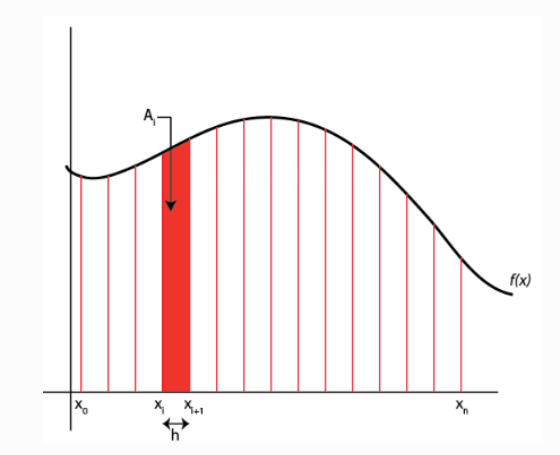

We would try to find this area using a computer. Note that the techniques described here are only approximate estimates of the answer and nit the exact answer.

## Rectangular method
The simplest way of evaluating an integral is divide the given range in N rectangles of width $h$, and then add the area of all these rectangles. $$I=\sum_{i=0}^{N-1}f(x_i)h$$ We can use either the left end or the right end of the rectangle as the height, but both lead to error. 
We can also take the midpoint as the height, $$I=\sum_{i=0}^{N-1}f(\frac{x_i+x_{i+1}}{2})h$$

In [1]:
import numpy as np
def f(x):
    return np.sin(x)+np.cos(x)

x=np.linspace(0,np.pi,101)

left=right=mid=0

for i in range(100):
    left=left+f(x[i])
    right=right+f(x[i+1])
    mid=mid+f((x[i]+x[i+1])/2)

    
left=left*np.pi/100
right=right*np.pi/100
mid=mid*np.pi/100

print(left,right,mid)

2.0312514304233416 1.9684195773515456 2.0000822490709864


In [2]:
left=right=mid=0

x=np.linspace(0,np.pi,10001)


for i in range(10000):
    left=left+f(x[i])
    right=right+f(x[i+1])
    mid=mid+f((x[i]+x[i+1])/2)

    
left=left*np.pi/10000
right=right*np.pi/10000
mid=mid*np.pi/10000

print(left,right,mid)

2.0003141428160225 1.9996858242853046 2.0000000082246734


## Trapezoid method
The rectangular method has significant error. We can improve the method by approximating each interval as trapezoids instead of rectangles.
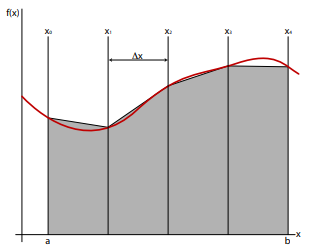

$$I=\sum_{i=0}^{N-1}(\frac{f(x_i)+f(x_{i+1})}{2})h$$ We can expand and simplify the above expression to $$I=(\frac{f(x_0)+f(x_{N})}{2}+\sum_{i=1}^{N-1}f(x_i))h$$

In [3]:
x=np.linspace(0,np.pi,101)

I=0

for i in range(100):
    I=I+(f(x[i])+f(x[i+1]))/2


I=I*np.pi/100

print(I)

1.9998355038874438


In [4]:
x=np.linspace(0,np.pi,10001)

I=0

for i in range(10000):
    I=I+(f(x[i])+f(x[i+1]))/2


I=I*np.pi/10000

print(I)

1.9999999835506588


## Simpson's method
The rectangular method approximates the function as constant for each small slice, while the trapezoid method approximates it as a linear equation. The Simpson's method approximates the function as a parabola for each small slice. To define a parabola, we need at least three points, therefore, a pair of slices define a parabola. 
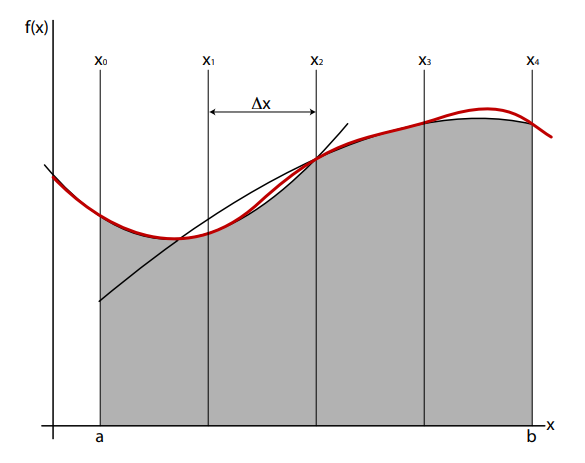

Simpson's method can be expressed in the following form $$I=\frac{h}{3}\sum_{i=odd}^{N-1}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))$$  You can find the derivation here https://math.stackexchange.com/a/1331775. The above expression can be further simplified to $$I=\frac{h}{3}(f(x_0)+4f(x_1)+2f(x_2)+4f(x_3)+...+4f(x_{N-1})+f(x_N))$$
For this method, N must be even.

The error in rectangular and trapezoid method goes as $h^2$ while its $h^4$ for Simpson's method

In [5]:
x=np.linspace(0,np.pi,102)

I=f(x[0])

for i in range(1,101,2):
    I=I+(4*f(x[i])+2*f(x[i+1]))

I=I+f(x[101])
I=I*np.pi/303

print(I)

2.0102070377490904


In [6]:
x=np.linspace(0,np.pi,10002)

I=f(x[0])

for i in range(1,10001,2):
    I=I+(4*f(x[i])+2*f(x[i+1]))

I=I+f(x[10001])
I=I*np.pi/30003

print(I)

2.000104692838139


## Assignment
Evaluate the integral of $e^{-x^2}$ and $\frac{sin(x)}{x}$ from $-\infty$ to $\infty$. 

Integral of $e^{-x^2}$ is called the Gaussian integral, based on the Gaussian distribution which we encounter many times in physics. https://mathworld.wolfram.com/GaussianIntegral.html

$\frac{sin(x)}{x}$, also denoted as $sinc(x)$ function, is the intensity pattern we get in diffraction from a single slit. https://math.stackexchange.com/questions/2322547/improper-integral-of-sinx-x-from-zero-to-infinity

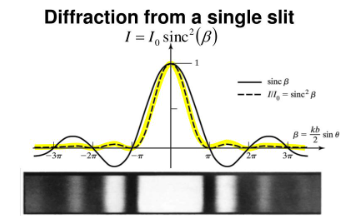